In [2]:
from ClassesSim import MCCTClassical
import numpy as np 
import matplotlib.pyplot as plt
from fractions import Fraction
def binder(param):
    return 1-np.average(param**4, axis=0)/(3*np.average(param**2,axis=0)**2)
def binderr(param):
    first = -1/(3*np.average(param**2,axis=0)**2) * np.std((param)**4,axis=0,ddof=1)/np.sqrt(len(param[:,0,0,0]))
    second = np.average(param**4, axis=0)/(np.average(param**2,axis=0)**3)*np.std(param*2,axis=0,ddof=1)/np.sqrt(len(param[:,0,0,0]))
    return np.sqrt(first**2+second**2)

In [3]:
MC = MCCTClassical(10,10,10,int(1e6)//100,[0,0.1,1,100],[0,50,100],5,-1,0,1)
MC.Simulation()

/Users/joshuakarten/VSCODE/LabResearch/ClassesSim.py:117: RuntimeWarning: overflow encountered in exp
  return np.exp(-beta * (final - initial))*self.boltzmannMod


In [4]:
print(np.min(MC.recordtot))

-1.0


In [5]:
import pandas as pd
pd.DataFrame(np.average(MC.recordtot,axis=0)[-1])


,0,1,2
0,-0.004,-0.044,-0.056
1,-0.112,-0.140,-0.056
2,-1.000,-1.000,-1.000
3,-0.960,-0.880,-0.920


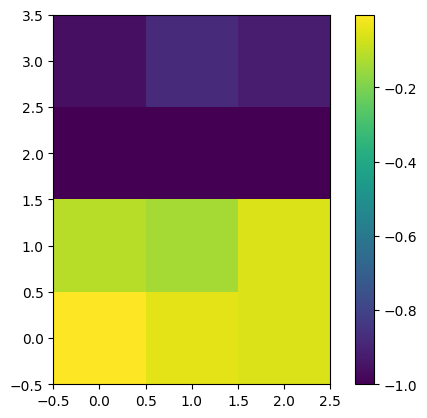

In [6]:
fig,ax=plt.subplots()
rec=ax.imshow(np.average(MC.recordtot,axis=0)[-1,:,:], origin='lower', interpolation='nearest')
fig.colorbar(rec, ax=ax, location ='right', shrink = 1)


In [7]:
test = MCCTClassical(4,4,10,100000,[0,0.1,1,10],[0,50,100],10,-1)
test.createLattice()
for i in range(test.numChains):
    if i%2==0:
        test.lattice[i]=0b1010
    else:
        test.lattice[i]=0b0101
print(test.LatticeOrderParameter(),test.lattice)
for i in test.lattice:
    print(bin(i))

1.0 [10  5 10  5]
0b1010
0b101
0b1010
0b101


In [8]:
for i in range(test.numChains):
    test.lattice[i]=0b1111

In [9]:
r1=0
r2=0
for i in range(test.numChains):
        r1+= (bin(test.left(test.lattice[i])^test.lattice[i]).count('1'))
        r2+= (bin(test.lattice[i]^test.lattice[i-1]).count('1'))

r2=  (2*r2/(test.latticeSize)-1)/2
r1 = (2*r1/(test.latticeSize)-1)/2
print(r1,r2)

-0.5 -0.5


In [10]:
test.LatticeOrderParameter()

-1.0

In [11]:
test.order_parameter(0b1111),test.order_parameter(0)

(-1.0, -1.0)

In [12]:
num = 0b1111
num2 = test.dec2int(Fraction(1,3))
x=bin(test.left(num2)^num2).count('1')
2*x/4-1

1.0

In [13]:
test.order_parameter(0b1010)

1.0

In [16]:
test2d = MCCTClassical(10,10,100,100000,[0],[0],1,-1)

numpy.float64

In [23]:
afmArray = np.zeros((10),dtype=int)
for i in range(5):
    afmArray[2*i]=int(0b1010101010)
    afmArray[2*i+1]=int(0b0101010101)
print(afmArray)
test2d.lattice=afmArray
print(test2d.LatticeOrderParameter2d())


[682 341 682 341 682 341 682 341 682 341]
1.0


In [18]:
for i in afmArray:
    print(bin(test2d.left(i)^i))

TypeError: ufunc 'right_shift' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''